https://github.com/dmlc/dgl/issues/644

https://easyupload.io/m/ofmvbi

https://github.com/dmlc/dgl/issues/644

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# from tqdm.autonotebook import tqdm
# import tqdm
# import umap
import pandas as pd
import torch
import dgl
import os

Using backend: pytorch


In [2]:
syllable_df_Nest1 = pd.read_pickle(r'E:\ZF_DataSet\zf_Nest1_noRescale1.pickle')
syllable_df_Nest2 = pd.read_pickle(r'E:\ZF_DataSet\zf_Nest2_noRescale.pickle')
syllable_df_Nest3 = pd.read_pickle(r'E:\ZF_DataSet\zf_Nest3_noRescale1.pickle')

In [4]:
syllable_df_Nest1 = pd.read_pickle(r'E:\ZF_DataSet\zf_Nest1_noRescale1.pickle')
syllable_df_Nest3 = pd.read_pickle(r'E:\ZF_DataSet\zf_Nest3_noRescale1.pickle')

In [5]:
# syllable_df_Nest_Total = pd.concat([syllable_df_Nest1, syllable_df_Nest2, syllable_df_Nest3])
syllable_df_Nest_Total = pd.concat([syllable_df_Nest1, syllable_df_Nest3])

In [8]:
del syllable_df_Nest1,syllable_df_Nest3

In [9]:
syllable_df_Nest_Total

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram
0,0.103084,0.133787,-,cyea,1,cyea_0000,"[-0.0037507678, -0.0037730576, -0.0033396403, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0.197664,0.342063,a,cyea,2,cyea_0000,"[-0.0016009295, -0.00080086064, 0.00024397256,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0.369546,0.536848,b,cyea,3,cyea_0000,"[0.0028250518, 0.0025573175, 0.002130959, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0.559955,0.687823,c,cyea,4,cyea_0000,"[0.00036472746, 0.00013401418, -0.00052369735,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0.726644,0.832925,d,cyea,5,cyea_0000,"[0.0033374317, 0.004109387, 0.003555804, 0.002...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...
2336,7.075119,7.226888,0,xsup,43,xsup_0038,"[-0.0032940966, -0.0016097012, 0.00020126643, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2337,7.271582,7.393895,0,xsup,44,xsup_0038,"[0.001897059, 0.0014919004, 0.00013391365, -0....",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2338,7.438385,7.489428,0,xsup,45,xsup_0038,"[-0.0044735107, -0.0024320602, -0.00042925373,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2339,7.524416,7.583509,0,xsup,46,xsup_0038,"[-0.0012339784, 0.0007764878, 0.0044724033, 0....",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [10]:
unique_keys = syllable_df_Nest_Total.key.unique()

In [11]:
unique_keys

array(['cyea_0000', 'cyea_0001', 'cyea_0002', 'cyea_0003', 'cyea_0004',
       'cyea_0005', 'cyea_0006', 'cyea_0007', 'cyea_0008', 'cyea_0009',
       'cyea_0010', 'cyea_0011', 'cyea_0012', 'cyea_0013', 'cyea_0014',
       'cyea_0015', 'cyea_0016', 'cyea_0017', 'cyea_0018', 'cyea_0019',
       'cyea_0020', 'cyea_0021', 'cyea_0022', 'cyea_0023', 'cyea_0024',
       'cyea_0025', 'cyea_0026', 'cyea_0027', 'cyea_0028', 'cyea_0029',
       'cyea_0030', 'cyea_0031', 'cyea_0032', 'cyea_0033', 'cyea_0034',
       'cyea_0035', 'cyea_0036', 'cyea_0037', 'cyea_0038', 'cyea_0039',
       'cyea_0040', 'hphi_0000', 'hphi_0001', 'hphi_0002', 'hphi_0003',
       'hphi_0004', 'hphi_0005', 'hphi_0006', 'hphi_0007', 'hphi_0008',
       'hphi_0009', 'hphi_0010', 'hphi_0011', 'hphi_0012', 'hphi_0013',
       'hphi_0014', 'hphi_0015', 'hphi_0016', 'hphi_0017', 'hphi_0018',
       'hphi_0019', 'hphi_0020', 'hphi_0021', 'hphi_0022', 'hphi_0023',
       'hphi_0024', 'hphi_0025', 'hphi_0026', 'hphi_0027', 'hphi

In [12]:
unique_keys.shape

(278,)

In [11]:
syllable_df_Nest_Total.reset_index(drop=True, inplace=True)

In [12]:
syllable_df_Nest_Total

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram
0,0.103084,0.133787,-,cyea,1,cyea_0000,"[-0.0037507678, -0.0037730576, -0.0033396403, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0.197664,0.342063,a,cyea,2,cyea_0000,"[-0.0016009295, -0.00080086064, 0.00024397256,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0.369546,0.536848,b,cyea,3,cyea_0000,"[0.0028250518, 0.0025573175, 0.002130959, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0.559955,0.687823,c,cyea,4,cyea_0000,"[0.00036472746, 0.00013401418, -0.00052369735,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0.726644,0.832925,d,cyea,5,cyea_0000,"[0.0033374317, 0.004109387, 0.003555804, 0.002...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...
6531,3.418322,3.531202,x,qfod,25,qfod_0020,"[0.001607974, 0.0014466287, 0.0013839657, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6532,3.547302,3.618005,a,qfod,26,qfod_0020,"[0.0031453993, 0.0033043711, 0.0031612804, 0.0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6533,3.640884,3.760068,b,qfod,27,qfod_0020,"[-0.00044836118, -0.00051836553, -0.0005220862...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6534,3.802132,3.856871,c,qfod,28,qfod_0020,"[-0.0010881362, -0.00035361922, 9.417791e-06, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [17]:
current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==unique_keys[1]]

In [18]:
current_songfile

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram
8,0.117506,0.152993,0,cyea,1,cyea_0001,"[-0.00037137, 4.7047957e-05, 0.0002565287, 0.0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9,0.192630,0.332857,a,cyea,2,cyea_0001,"[0.0011349955, 0.0020628849, 0.0023775643, 0.0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
10,0.361950,0.535261,b,cyea,3,cyea_0001,"[-0.0034360948, -0.003357369, -0.0035251137, -...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
11,0.552766,0.681565,c,cyea,4,cyea_0001,"[0.0014408395, 0.002870692, 0.0026942156, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
12,0.719977,0.825397,d,cyea,5,cyea_0001,"[-0.0016020363, -9.5485055e-05, 0.0011669077, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
13,0.879093,0.941859,e,cyea,6,cyea_0001,"[0.0028592453, 0.0038831835, 0.0046247137, 0.0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
14,0.970363,1.142404,b,cyea,7,cyea_0001,"[-0.001890278, -0.0015421592, -0.0014457257, -...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
15,1.164490,1.293039,c,cyea,8,cyea_0001,"[-1.8841472e-05, -0.0013359456, -0.0010901309,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [32]:
current_songfile.shape

(8, 9)

In [95]:
# temporary_node_number = torch.linspace(0,current_songfile.shape[0]-1,current_songfile.shape[0], dtype=int)

In [96]:
# temporary_node_number

tensor([0, 1, 2, 3, 4, 5, 6, 7])

In [98]:
# g1 = dgl.graph((temporary_node_number[:-1],temporary_node_number[1:]))

In [99]:
# temporary_node_number[:-1]

tensor([0, 1, 2, 3, 4, 5, 6])

In [100]:
# temporary_node_number[1:]

tensor([1, 2, 3, 4, 5, 6, 7])

In [53]:
# current_songfile['spectrogram'].values[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [56]:
# torch.Tensor(current_songfile['spectrogram'].values[0])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [101]:
# current_songfile_node_features = []
# for spec in current_songfile['spectrogram'].values:
#     current_songfile_node_features.append((spec.flatten()))

In [102]:
# torch.tensor(current_songfile_node_features)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [103]:
# torch.tensor(current_songfile_node_features).shape

torch.Size([8, 277504])

In [86]:
# g1.number_of_nodes

<bound method DGLHeteroGraph.number_of_nodes of Graph(num_nodes=9, num_edges=8,
      ndata_schemes={'h': Scheme(shape=(5,), dtype=torch.float32)}
      edata_schemes={})>

In [104]:
# g1.ndata['h']=torch.tensor(current_songfile_node_features)

In [13]:
def create_graph_label(given_key):
#     current_songfile = syllable_df_Nest1.loc[syllable_df_Nest1['key']==unique_keys[i]]
    current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==given_key]
    temporary_node_number = torch.linspace(0,current_songfile.shape[0]-1,current_songfile.shape[0], dtype=int)
    current_graph = dgl.graph((temporary_node_number[:-1],temporary_node_number[1:]))
    current_songfile_node_features = []
    for spec in current_songfile['spectrogram'].values:
        current_songfile_node_features.append((spec.flatten()))
    current_graph.ndata['h']=torch.tensor(current_songfile_node_features, dtype=torch.double)
    graph_label = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==given_key]['indv'].values[0]
    return current_graph, graph_label

In [17]:
# g1,l1 = create_graph(1)
# g2,l2 = create_graph(2)

In [119]:
# g2

Graph(num_nodes=8, num_edges=7,
      ndata_schemes={'h': Scheme(shape=(277504,), dtype=torch.uint8)}
      edata_schemes={})

In [120]:
# l2

'cyea'

In [18]:
# Graph_Total = []
# Graph_Total.append(g1)
# Graph_Total.append(g2)
# bg = dgl.batch(Graph_Total)
# dgl.readout_nodes(bg, 'h')  #Chnage dtype to float # https://docs.dgl.ai/en/latest/guide/training-graph.html

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [122]:
# bg

Graph(num_nodes=16, num_edges=14,
      ndata_schemes={'h': Scheme(shape=(277504,), dtype=torch.uint8)}
      edata_schemes={})

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

Graph_Total = []
Label_Total = []
for key in unique_keys:
    print(key)
    graph_current, label_current = create_graph_label(key)
    Graph_Total.append(graph_current)
    Label_Total.append(label_current)

<IPython.core.display.Javascript object>

cyea_0000
cyea_0001
cyea_0002
cyea_0003
cyea_0004
cyea_0005
cyea_0006
cyea_0007
cyea_0008
cyea_0009
cyea_0010
cyea_0011
cyea_0012
cyea_0013
cyea_0014
cyea_0015
cyea_0016
cyea_0017
cyea_0018
cyea_0019
cyea_0020
cyea_0021
cyea_0022
cyea_0023
cyea_0024
cyea_0025
cyea_0026
cyea_0027
cyea_0028
cyea_0029
cyea_0030
cyea_0031
cyea_0032
cyea_0033
cyea_0034
cyea_0035
cyea_0036
cyea_0037
cyea_0038
cyea_0039
cyea_0040
hphi_0000
hphi_0001
hphi_0002
hphi_0003
hphi_0004
hphi_0005
hphi_0006
hphi_0007
hphi_0008
hphi_0009
hphi_0010
hphi_0011
hphi_0012
hphi_0013
hphi_0014
hphi_0015
hphi_0016
hphi_0017
hphi_0018
hphi_0019
hphi_0020
hphi_0021
hphi_0022
hphi_0023
hphi_0024
hphi_0025
hphi_0026
hphi_0027
hphi_0028
hphi_0029
hphi_0030
hphi_0031
hphi_0032
hphi_0033
hphi_0034
hphi_0035
hphi_0036
hphi_0037
hphi_0038
hphi_0039
hphi_0040
hphi_0041
hphi_0042
hphi_0043
ivoj_0000
ivoj_0001
ivoj_0002
ivoj_0003
ivoj_0004
ivoj_0005
ivoj_0006
phpd_0000
phpd_0001
phpd_0002
phpd_0003
phpd_0004
phpd_0005
phpd_0006
phpd_0007


In [ ]:
del syllable_df_Nest_Total

In [15]:
len(Graph_Total)

155

In [16]:
len(Label_Total)

155

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
targets = le.fit_transform(Label_Total)

In [18]:
targets = torch.as_tensor(targets, dtype=torch.long)

In [19]:
targets

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [64]:
list(le.classes_)

['cyea', 'hphi', 'ivoj', 'phpd']

In [55]:
# type(targets)

torch.Tensor

In [20]:
Graph_Total[0]

Graph(num_nodes=8, num_edges=7,
      ndata_schemes={'h': Scheme(shape=(277504,), dtype=torch.float64)}
      edata_schemes={})

In [21]:
from dgl.data.dgl_dataset import DGLDataset
from dgl.data.utils import save_graphs, load_graphs, makedirs

__all__ = ['ZebraFinchDataset']

class ZebraFinchDataset(DGLDataset):
    """The synthetic graph classification dataset class.
        Parameters
    ----------
    num_graphs: int
        Number of graphs in this dataset.
    min_num_v: int
        Minimum number of nodes for graphs
    max_num_v: int
        Maximum number of nodes for graphs
    seed : int, default is 0
        Random seed for data generation
    Attributes
    ----------
    num_graphs : int
        Number of graphs
    min_num_v : int
        The minimum number of nodes
    max_num_v : int
        The maximum number of nodes
    num_classes : int
        The number of classes
    Examples
    --------
    >>> data = MiniGCDataset(100, 16, 32, seed=0)
    The dataset instance is an iterable
    >>> len(data)
    100
    >>> g, label = data[64]
    >>> g
    Graph(num_nodes=20, num_edges=82,
          ndata_schemes={}
          edata_schemes={})
    >>> label
    tensor(5)
    Batch the graphs and labels for mini-batch training
    >>> graphs, labels = zip(*[data[i] for i in range(16)])
    >>> batched_graphs = dgl.batch(graphs)
    >>> batched_labels = torch.tensor(labels)
    >>> batched_graphs
    Graph(num_nodes=356, num_edges=1060,
          ndata_schemes={}
          edata_schemes={})
    """

    def __init__(self, graphs, labels, seed=0,
                 save_graph=True, force_reload=False, verbose=False):
#         self.num_graphs = num_graphs
#         self.min_num_v = min_num_v
#         self.max_num_v = max_num_v
        self.seed = seed
        self.save_graph = save_graph
        self.graphs = graphs
        self.labels = labels

        super(ZebraFinchDataset, self).__init__(name="ZebraFinch", hash_key=(graphs, labels, seed),
                                            force_reload=force_reload,
                                            verbose=verbose)

#     def process(self):
#         time.sleep(0.01)
#         self.graphs = graphs
#         self.labels = labels
#         self._generate(graphs, labels, self.seed)

    def __len__(self):
        """Return the number of graphs in the dataset."""
        return len(self.graphs)

    def __getitem__(self, idx):
        """Get the idx-th sample.
        Parameters
        ---------
        idx : int
            The sample index.
        Returns
        -------
        (:class:`dgl.Graph`, Tensor)
            The graph and its label.
        """
        return self.graphs[idx], self.labels[idx]

    def has_cache(self):
        graph_path = os.path.join(self.save_path, 'dgl_graph_{}.bin'.format(self.hash))
        if os.path.exists(graph_path):
            return True

        return False

    def save(self):
        """save the graph list and the labels"""
        if self.save_graph:
            graph_path = os.path.join(self.save_path, 'dgl_graph_{}.bin'.format(self.hash))
            save_graphs(str(graph_path), self.graphs, {'labels': self.labels})

    def load(self):
        graphs, label_dict = load_graphs(os.path.join(self.save_path, 'dgl_graph_{}.bin'.format(self.hash)))
        self.graphs = graphs
        self.labels = label_dict['labels']

    @property
    def num_classes(self):
        """Number of classes."""
        return len(torch.unique(self.labels))

    def _generate(self, seed):
        if seed is not None:
            np.random.seed(seed)
        # preprocess
        for i in range(self.num_graphs):
            # convert to DGLGraph, and add self loops
            self.graphs[i] = add_self_loop(from_networkx(self.graphs[i]))
        self.labels = F.tensor(np.array(self.labels).astype(np.int))

In [23]:
trainset = ZebraFinchDataset(Graph_Total, targets)

In [24]:
type(trainset)

__main__.ZebraFinchDataset

In [68]:
# Trainset_test = ZebraFinchDataset(Graph_Total[35:50], targets[35:50])

In [70]:
# import pickle

# with open('ZFTrainset.pickle', 'wb') as handle:
#     pickle.dump((Graph_Total[35:50], targets[35:50]), handle)

In [25]:
import dgl
import torch

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

In [42]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Create training and test sets.
# trainset = MiniGCDataset(320, 10, 20)
# testset = MiniGCDataset(80, 10, 20)
# Use PyTorch's DataLoader and the collate function
# defined before.
data_loader = DataLoader(trainset, batch_size=32, shuffle=True,
                         collate_fn=collate)

In [35]:
g,vlabels = trainset[0]

In [36]:
g

Graph(num_nodes=8, num_edges=7,
      ndata_schemes={'h': Scheme(shape=(277504,), dtype=torch.float64)}
      edata_schemes={})

In [37]:
vlabels

tensor(0)

In [38]:
trainset.num_classes

4

In [46]:
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn.pytorch import GraphConv

class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()
        self.conv1 = GraphConv(in_dim, hidden_dim,allow_zero_in_degree=True)
        self.conv2 = GraphConv(hidden_dim, hidden_dim,allow_zero_in_degree=True)
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # Use node degree as the initial node feature. For undirected graphs, the in-degree
        # is the same as the out_degree.
        h = g.ndata['h'].float()
        # Perform graph convolution and activation function.
        h = F.relu(self.conv1(g, h))
        h = F.relu(self.conv2(g, h)) 
        g.ndata['h'] = h
        # Calculate graph representation by averaging all the node representations.
        hg = dgl.mean_nodes(g, 'h')     ### Readout Function
        return self.classify(hg.float())

In [47]:
# Create model
model = Classifier(277504, 256, trainset.num_classes)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()

Classifier(
  (conv1): GraphConv(in=277504, out=256, normalization=both, activation=None)
  (conv2): GraphConv(in=256, out=256, normalization=both, activation=None)
  (classify): Linear(in_features=256, out_features=4, bias=True)
)

In [49]:
epoch_losses = []
for epoch in range(50):
    epoch_loss = 0
    for iter, (bg, label) in enumerate(data_loader):
#         print(bg)
        prediction = model(bg)
        loss = loss_func(prediction, label.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)

Epoch 0, loss 4522.3934
Epoch 1, loss 854.6261
Epoch 2, loss 443.2906
Epoch 3, loss 151.8110
Epoch 4, loss 43.5269
Epoch 5, loss 177.0350
Epoch 6, loss 128.1465
Epoch 7, loss 64.2261
Epoch 8, loss 101.4683
Epoch 9, loss 36.3270
Epoch 10, loss 10.0386
Epoch 11, loss 0.8672
Epoch 12, loss 2.6389
Epoch 13, loss 31.9747
Epoch 14, loss 6.8470
Epoch 15, loss 0.0000
Epoch 16, loss 3.2537
Epoch 17, loss 0.6544
Epoch 18, loss 0.1870
Epoch 19, loss 1.8024
Epoch 20, loss 0.2199
Epoch 21, loss 0.4557
Epoch 22, loss 0.0000
Epoch 23, loss 2.2122
Epoch 24, loss 1.4885
Epoch 25, loss 2.6950
Epoch 26, loss 1.3894
Epoch 27, loss 1.4817
Epoch 28, loss 2.1467
Epoch 29, loss 4.2997
Epoch 30, loss 0.0000
Epoch 31, loss 3.4150
Epoch 32, loss 0.0000
Epoch 33, loss 0.0000
Epoch 34, loss 0.0000
Epoch 35, loss 0.0000
Epoch 36, loss 0.0000
Epoch 37, loss 0.1980
Epoch 38, loss 0.4523
Epoch 39, loss 0.0000
Epoch 40, loss 0.0000
Epoch 41, loss 0.0000
Epoch 42, loss 0.5651
Epoch 43, loss 0.0000
Epoch 44, loss 0.0000


KeyboardInterrupt: 

In [44]:
len(torch.unique(targets))

4

In [ ]:
First_layer_pred = []
for i in range(0,len(trainset)):
    h = trainset.graphs[i].ndata['h'].float()
    # Perform graph convolution and activation function.
    h = F.relu(model.conv1(trainset.graphs[i], h))
    h = F.relu(model.conv2(trainset.graphs[i], h)) 
    trainset.graphs[i].ndata['h'] = h
    # Calculate graph representation by averaging all the node representations.
    hg = dgl.mean_nodes(trainset.graphs[i], 'h')
    h = trainset.graphs[i].in_degrees().view(-1, 1).float()
    x = F.relu(model.conv1(trainset.graphs[i], h))
    First_layer_pred.append(np.mean(x.detach().numpy(),0))

In [50]:
Classify_layer_pred = []

for i in range(0,len(trainset)):
    x = model(trainset.graphs[i])
    Classify_layer_pred.append(np.mean(x.detach().numpy(),0))

In [53]:
Classify_layer_pred

[array([ 6704.07  , -1319.8153,  1028.9525, -1859.3843], dtype=float32),
 array([ 6958.9204, -1407.0354,  1011.8477, -2040.3275], dtype=float32),
 array([ 7019.128  , -1399.8795 ,   928.99396, -1918.8816 ], dtype=float32),
 array([ 6805.9556, -1441.0592,   693.7828, -1677.8171], dtype=float32),
 array([ 7741.8223 , -1419.1614 ,   926.41547, -2199.0652 ], dtype=float32),
 array([ 7784.2417, -1706.6943,   707.7316, -2108.802 ], dtype=float32),
 array([ 8248.719 , -1791.8871,   622.2016, -2439.042 ], dtype=float32),
 array([ 8078.9155, -1765.3156,   575.6425, -2318.478 ], dtype=float32),
 array([ 7491.7363, -1541.6936,   833.9101, -2093.327 ], dtype=float32),
 array([ 6709.4614, -1272.1573,   784.5096, -1651.8436], dtype=float32),
 array([ 7500.2363, -1517.932 ,   770.4339, -2134.264 ], dtype=float32),
 array([ 7549.655 , -1465.1884,   686.5883, -2204.5667], dtype=float32),
 array([11213.847 , -3364.4211, -1028.0822, -3257.826 ], dtype=float32),
 array([ 7745.6675, -1526.8159,   627.3079,

In [54]:
Classify_layer_pred = np.stack(Classify_layer_pred, axis=0)

In [55]:
Classify_layer_pred

array([[ 6704.07   , -1319.8153 ,  1028.9525 , -1859.3843 ],
       [ 6958.9204 , -1407.0354 ,  1011.8477 , -2040.3275 ],
       [ 7019.128  , -1399.8795 ,   928.99396, -1918.8816 ],
       [ 6805.9556 , -1441.0592 ,   693.7828 , -1677.8171 ],
       [ 7741.8223 , -1419.1614 ,   926.41547, -2199.0652 ],
       [ 7784.2417 , -1706.6943 ,   707.7316 , -2108.802  ],
       [ 8248.719  , -1791.8871 ,   622.2016 , -2439.042  ],
       [ 8078.9155 , -1765.3156 ,   575.6425 , -2318.478  ],
       [ 7491.7363 , -1541.6936 ,   833.9101 , -2093.327  ],
       [ 6709.4614 , -1272.1573 ,   784.5096 , -1651.8436 ],
       [ 7500.2363 , -1517.932  ,   770.4339 , -2134.264  ],
       [ 7549.655  , -1465.1884 ,   686.5883 , -2204.5667 ],
       [11213.847  , -3364.4211 , -1028.0822 , -3257.826  ],
       [ 7745.6675 , -1526.8159 ,   627.3079 , -2330.4612 ],
       [ 9844.641  , -2528.8425 ,   725.0052 , -3179.467  ],
       [ 2495.1895 ,  -618.5751 ,   862.8227 ,   136.20116],
       [ 7932.969  , -17

In [57]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [58]:
Classify_layer_TSNE = TSNE(2, perplexity = 10, learning_rate=10, verbose=1, n_iter=2000, random_state=2020)
Y = Classify_layer_TSNE.fit_transform(Classify_layer_pred)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 155 samples in 0.014s...
[t-SNE] Computed neighbors for 155 samples in 0.260s...
[t-SNE] Computed conditional probabilities for sample 155 / 155
[t-SNE] Mean sigma: 213.583415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.020447
[t-SNE] KL divergence after 2000 iterations: 0.219417


In [59]:
colors = cm.rainbow(np.linspace(0, 1, max(trainset.labels).detach().numpy()+1)) 

In [60]:
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

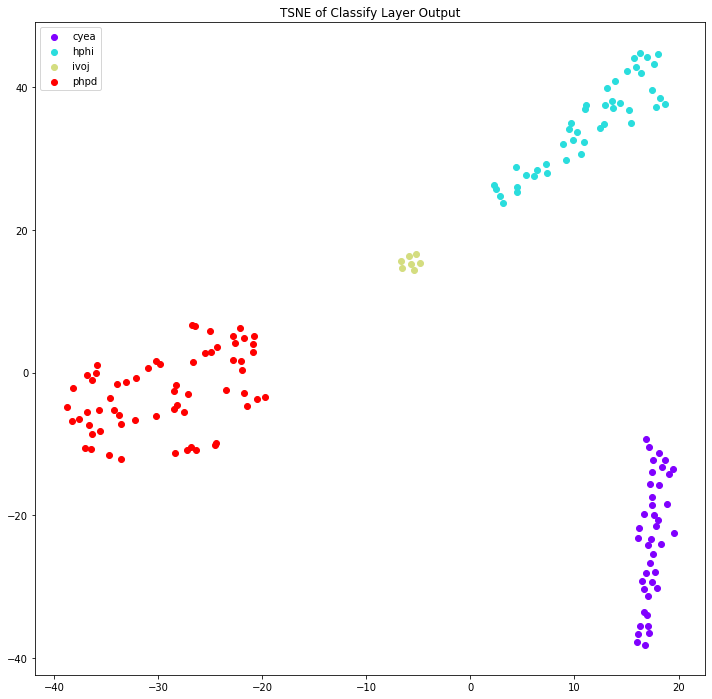

In [65]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
for i in range(0,max(trainset.labels).detach().numpy()+1):
    label_index = (targets == i)
    #color_indx = int(trainset.labels[i].detach().numpy());
    ax.scatter(Y[label_index, 0], Y[label_index, 1],color=colors[i])
#handles, labels = ax.get_legend_handles_labels()
plt.legend(list(le.classes_), loc='best')
plt.title('TSNE of Classify Layer Output')
plt.show()

In [67]:
torch.save(model.state_dict(), 'G1')

In [66]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_forward_unimplemented',
 '_get_name',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module',
 'apply',
 'bfloat16',
 'buffers',
 'children',
 'classify',
 'conv1',
 '